In [1]:
import yfinance as yf

# Download USD/JPY data (ticker: JPY=X)
data = yf.download("JPY=X", start="2015-01-01", end="2025-01-01", interval="1d")
print(data.head())


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\861424172.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("JPY=X", start="2015-01-01", end="2025-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open Volume
Ticker           JPY=X       JPY=X       JPY=X       JPY=X  JPY=X
Date                                                             
2015-01-01  119.672997  119.672997  119.672997  119.672997      0
2015-01-02  119.870003  120.736000  119.835999  119.889999      0
2015-01-05  120.433998  120.608002  119.411003  120.389000      0
2015-01-06  119.425003  119.497002  118.680000  119.416000      0
2015-01-07  118.672997  119.639000  118.674004  118.674004      0


In [2]:
data['Return'] = data['Close'].pct_change()


In [3]:
data['MA5'] = data['Close'].rolling(5).mean()
data['MA20'] = data['Close'].rolling(20).mean()


In [4]:
data['Volatility'] = data['Return'].rolling(20).std()


In [5]:
data['Target'] = (data['Return'].shift(-1) > 0).astype(int)


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
import yfinance as yf
import pandas as pd

# Download USD/JPY from Yahoo Finance
df = yf.download("JPY=X", start="2010-01-01", end="2025-01-01")

# Keep only Date and Close
df = df.reset_index()[["Date", "Close"]]

print(df.head())


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\3693234953.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("JPY=X", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price        Date      Close
Ticker                 JPY=X
0      2010-01-01  92.919998
1      2010-01-04  92.495003
2      2010-01-05  91.584999
3      2010-01-06  92.356003
4      2010-01-07  93.389999


In [8]:
import yfinance as yf
import pandas as pd

# Download USD/JPY exchange rate
df = yf.download("JPY=X", start="2010-01-01", end="2025-01-01")
df = df.reset_index()[["Date", "Close"]]

print(df.head())


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\4080415037.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("JPY=X", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price        Date      Close
Ticker                 JPY=X
0      2010-01-01  92.919998
1      2010-01-04  92.495003
2      2010-01-05  91.584999
3      2010-01-06  92.356003
4      2010-01-07  93.389999


In [9]:
import numpy as np

# Compute daily returns
df['Return'] = df['Close'].pct_change()

# Moving averages
df['MA5'] = df['Close'].rolling(5).mean()
df['MA20'] = df['Close'].rolling(20).mean()

# Rolling volatility (20-day window)
df['Volatility'] = df['Return'].rolling(20).std()

# Target variable: 1 if next day's return is positive, else 0
df['Target'] = (df['Return'].shift(-1) > 0).astype(int)

# Drop rows with NaN (from rolling windows & shift)
df = df.dropna()

# Check dataset
print(df.head())
print(df.shape)


Price        Date      Close    Return        MA5      MA20 Volatility Target
Ticker                 JPY=X                                                 
20     2010-01-29  90.269997  0.005480  90.008598  91.12250   0.006723      1
21     2010-02-01  90.760002  0.005428  90.077599  91.03575   0.006847      0
22     2010-02-02  90.428001 -0.003658  90.237199  90.97790   0.006557      1
23     2010-02-03  90.839996  0.004556  90.415199  90.90210   0.006330      0
24     2010-02-04  89.410004 -0.015742  90.341600  90.70310   0.006504      0
(3888, 7)


In [10]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['Return','MA5','MA20','Volatility']]
y = df['Target']

# Train-test split (80% train, 20% test, no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


Training samples: 3110
Test samples: 778


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5732647814910026
Confusion Matrix:
 [[ 19 317]
 [ 15 427]]


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,    # number of trees
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.4717223650385604
Confusion Matrix:
 [[247  89]
 [322 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.74      0.55       336
           1       0.57      0.27      0.37       442

    accuracy                           0.47       778
   macro avg       0.50      0.50      0.46       778
weighted avg       0.51      0.47      0.45       778



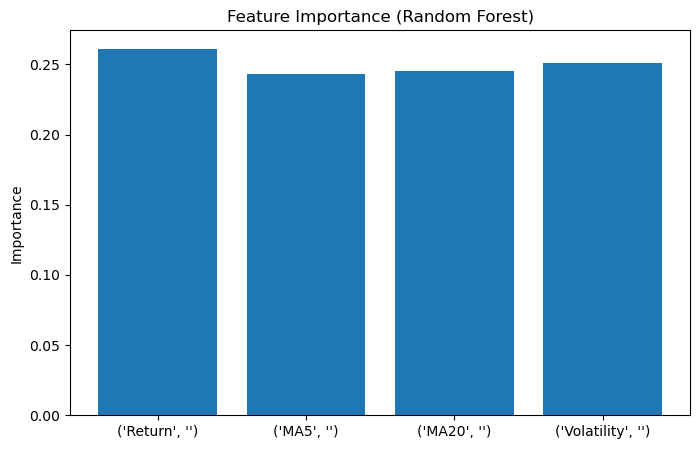

In [13]:
import matplotlib.pyplot as plt

# Ensure feature names are strings
features = [str(f) for f in X.columns]
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(8,5))
plt.bar(features, feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.show()


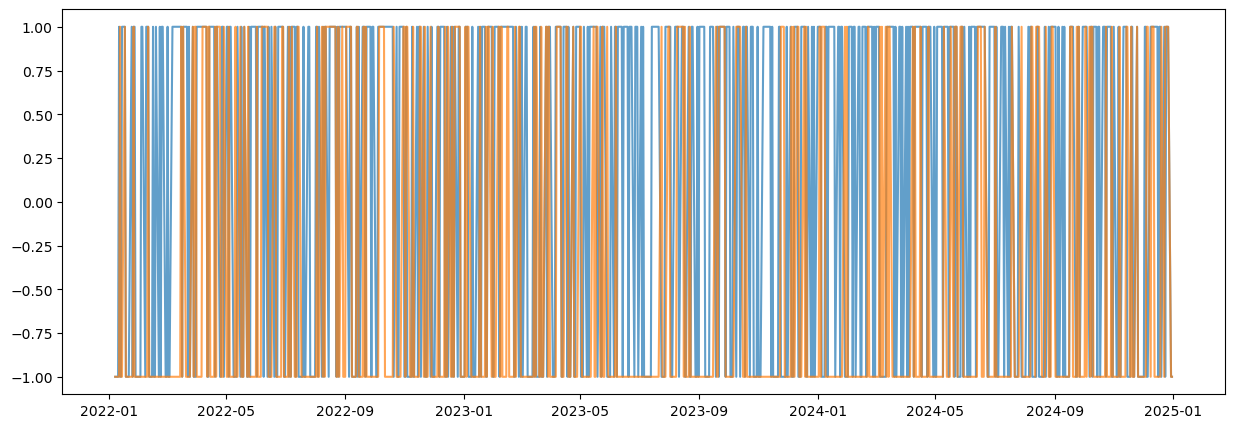

In [14]:
import matplotlib.pyplot as plt

# Add predictions to the test set
df_test = df.iloc[-len(y_test):].copy()  # align with test set
df_test['Predicted'] = y_pred_rf  # no .values needed

# Create a column for actual direction: +1 = up, -1 = down
df_test['ActualDirection'] = df_test['Target'].apply(lambda x: 1 if x==1 else -1)
df_test['PredictedDirection'] = df_test['Predicted'].apply(lambda x: 1 if x==1 else -1)

# Plot
plt.figure(figsize=(15,5))
plt.plot(df_test['Date'], df_test['ActualDirection'], label='Actual Direction', alpha=0.7)
plt.plot(df_test['Date'], df_test['PredictedDirection'], label='Predicted Direction', alpha=0.7)



In [15]:
import numpy as np

# Features
features = ['Return', 'MA5', 'MA20', 'Volatility']
data_lstm = df[features].values
target_lstm = df['Target'].values

# Sequence length (timesteps)
seq_length = 20

# Function to create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(target[i])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(data_lstm, target_lstm, seq_length)

# Train-test split (last 20% for testing)
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (3094, 20, 4)
X_test shape: (774, 20, 4)


In [16]:
!pip install tensorflow


In [17]:
import sys
print(sys.version)


3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


C:\Users\menen\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4986 - loss: 0.7063 - val_accuracy: 0.5323 - val_loss: 0.6911
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4943 - loss: 0.7059 - val_accuracy: 0.5419 - val_loss: 0.6926
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4932 - loss: 0.7006 - val_accuracy: 0.5323 - val_loss: 0.6909
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4943 - loss: 0.7000 - val_accuracy: 0.4677 - val_loss: 0.6981
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4953 - loss: 0.7024 - val_accuracy: 0.4677 - val_loss: 0.6992
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 0.6956 - val_accuracy: 0.5323 - val_loss: 0.6909
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5083 - loss: 0.6976 - val_accuracy: 0.4677 - val_loss: 0.6937
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5075 - loss: 0.6939 - val_accuracy: 0.5323 - val_loss: 0.6917
Epo

In [19]:
# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print("LSTM Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM Accuracy: 0.5697674418604651
Confusion Matrix:
 [[  0 333]
 [  0 441]]


In [20]:
# Add lagged returns
for lag in range(1, 6):  # past 5 days
    df[f'Return_lag{lag}'] = df['Return'].shift(lag)

# Drop NaN after lagging
df_rf = df.dropna()

# Features for Random Forest
feature_cols = ['Return','MA5','MA20','Volatility'] + [f'Return_lag{lag}' for lag in range(1,6)]
X_rf = df_rf[feature_cols]
y_rf = df_rf['Target']

# Train-test split
split = int(0.8 * len(X_rf))
X_train, X_test = X_rf[:split], X_rf[split:]
y_train, y_test = y_rf[:split], y_rf[split:]

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print("Random Forest Accuracy with lagged features:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy with lagged features: 0.47361647361647363
Confusion Matrix:
 [[221 114]
 [295 147]]


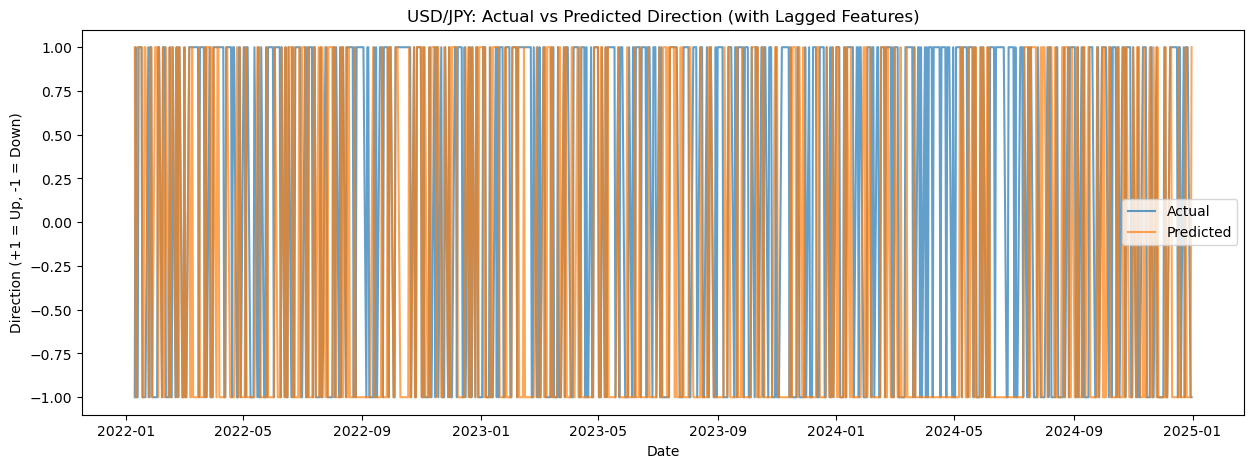

In [21]:
import matplotlib.pyplot as plt

df_test = df_rf.iloc[-len(y_test):].copy()
df_test['Predicted'] = y_pred_rf
df_test['ActualDirection'] = df_test['Target'].apply(lambda x: 1 if x==1 else -1)
df_test['PredictedDirection'] = df_test['Predicted'].apply(lambda x: 1 if x==1 else -1)

plt.figure(figsize=(15,5))
plt.plot(df_test['Date'], df_test['ActualDirection'], label='Actual', alpha=0.7)
plt.plot(df_test['Date'], df_test['PredictedDirection'], label='Predicted', alpha=0.7)
plt.title("USD/JPY: Actual vs Predicted Direction (with Lagged Features)")
plt.xlabel("Date")
plt.ylabel("Direction (+1 = Up, -1 = Down)")
plt.legend()
plt.show()


In [22]:
import yfinance as yf

# Download Nikkei 225 data
nikkei = yf.download('^N225', start='2010-01-01', end='2025-09-20')

# Display the first few rows
print(nikkei.head())


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\1751584629.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nikkei = yf.download('^N225', start='2010-01-01', end='2025-09-20')
[*********************100%***********************]  1 of 1 completed


Price              Close          High           Low          Open     Volume
Ticker             ^N225         ^N225         ^N225         ^N225      ^N225
Date                                                                         
2010-01-04  10654.790039  10694.490234  10608.139648  10609.339844  104400000
2010-01-05  10681.830078  10791.040039  10655.570312  10719.440430  166200000
2010-01-06  10731.450195  10768.610352  10661.169922  10709.549805  181800000
2010-01-07  10681.660156  10774.000000  10636.669922  10742.750000  182600000
2010-01-08  10798.320312  10816.450195  10677.559570  10743.299805  211800000


In [23]:
# Download USD/JPY exchange rate data
usd_jpy = yf.download('JPY=X', start='2010-01-01', end='2025-09-20')

# Display the first few rows
print(usd_jpy.head())


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\1511078396.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_jpy = yf.download('JPY=X', start='2010-01-01', end='2025-09-20')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open Volume
Ticker          JPY=X      JPY=X      JPY=X      JPY=X  JPY=X
Date                                                         
2010-01-01  92.919998  93.089996  92.919998  92.940002      0
2010-01-04  92.495003  93.200996  92.196999  92.760002      0
2010-01-05  91.584999  92.486000  91.282997  92.470001      0
2010-01-06  92.356003  92.709999  91.522003  91.550003      0
2010-01-07  93.389999  93.735001  92.110001  92.335999      0


In [24]:
# Merge the two DataFrames on the Date index
merged_data = pd.merge(nikkei[['Close']], usd_jpy[['Close']], left_index=True, right_index=True, suffixes=('_Nikkei', '_USDJPY'))

# Display the first few rows of the merged data
print(merged_data.head())


Price              Close           
Ticker             ^N225      JPY=X
Date                               
2010-01-04  10654.790039  92.495003
2010-01-05  10681.830078  91.584999
2010-01-06  10731.450195  92.356003
2010-01-07  10681.660156  93.389999
2010-01-08  10798.320312  92.660004


In [25]:
# Forward fill missing values
merged_data.fillna(method='ffill', inplace=True)

# Display the first few rows after filling missing values
print(merged_data.head())


Price              Close           
Ticker             ^N225      JPY=X
Date                               
2010-01-04  10654.790039  92.495003
2010-01-05  10681.830078  91.584999
2010-01-06  10731.450195  92.356003
2010-01-07  10681.660156  93.389999
2010-01-08  10798.320312  92.660004


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\2535012126.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


In [26]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Download Nikkei 225
nikkei = yf.download('^N225', start='2010-01-01', end='2025-09-20')[['Close']]
nikkei.rename(columns={'Close':'Nikkei'}, inplace=True)

# Download USD/JPY
usd_jpy = yf.download('JPY=X', start='2010-01-01', end='2025-09-20')[['Close']]
usd_jpy.rename(columns={'Close':'USDJPY'}, inplace=True)

# Merge datasets
df = pd.merge(usd_jpy, nikkei, left_index=True, right_index=True, how='inner')

# Compute USD/JPY returns
df['Return'] = df['USDJPY'].pct_change()

# Simple features
df['MA5'] = df['USDJPY'].rolling(5).mean()
df['MA20'] = df['USDJPY'].rolling(20).mean()
df['Volatility'] = df['Return'].rolling(20).std()

# Lagged returns
for lag in range(1,6):
    df[f'Return_lag{lag}'] = df['Return'].shift(lag)

# Target: next day direction
df['Target'] = (df['Return'].shift(-1) > 0).astype(int)

# Include Nikkei as feature
df['Nikkei'] = df['Nikkei']

# Drop NaNs
df = df.dropna()

# Features and target
feature_cols = ['Return','MA5','MA20','Volatility'] + [f'Return_lag{lag}' for lag in range(1,6)] + ['Nikkei']
X = df[feature_cols]
y = df['Target']

# Train-test split (80/20)
split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Accuracy
print("Random Forest Accuracy with Nikkei:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\2886337454.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nikkei = yf.download('^N225', start='2010-01-01', end='2025-09-20')[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\menen\AppData\Local\Temp\ipykernel_101856\2886337454.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_jpy = yf.download('JPY=X', start='2010-01-01', end='2025-09-20')[['Close']]
[*********************100%***********************]  1 of 1 completed


Random Forest Accuracy with Nikkei: 0.4882198952879581
Confusion Matrix:
 [[235 107]
 [284 138]]


In [27]:
!pip install pandas_datareader


In [28]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2025, 9, 20)

# Fed Funds Rate (FRED)
fed = web.DataReader('FEDFUNDS', 'fred', start, end)
fed.rename(columns={'FEDFUNDS':'FedRate'}, inplace=True)
fed.head()


,FedRate
DATE,
2010-01-01,0.11
2010-02-01,0.13
2010-03-01,0.16
2010-04-01,0.20
2010-05-01,0.20


In [29]:
# Use 1Y Japanese Government Bond Yield as BoJ rate proxy
boj = yf.download("^JGB1Y", start="2010-01-01", end="2025-09-20")[['Close']]
boj.rename(columns={'Close':'BoJRate'}, inplace=True)
boj.head()


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\2019883686.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  boj = yf.download("^JGB1Y", start="2010-01-01", end="2025-09-20")[['Close']]
HTTP Error 404: 
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^JGB1Y']: YFTzMissingError('possibly delisted; no timezone found')


Price,BoJRate
Ticker,^JGB1Y
Date,


In [30]:
# Ensure df_macro has a single-level Date column
df_macro = df.reset_index()  # resets the multiindex
df_macro = df_macro.rename(columns={'Date':'Date'})  # just to be explicit

# Ensure Fed & BoJ rates also have single-level Date index
fed = fed.reset_index()
fed.rename(columns={'DATE':'Date', 'FEDFUNDS':'FedRate'}, inplace=True)

boj = boj.reset_index()
boj.rename(columns={'Date':'Date', 'BoJRate':'BoJRate'}, inplace=True)


In [31]:
# Reset index fully
df_macro = df.reset_index()  # this converts MultiIndex to columns
df_macro.columns = [col if isinstance(col, str) else col[0] for col in df_macro.columns]  # flatten any tuple columns

# Ensure 'Date' is a column, not an index
if 'Date' not in df_macro.columns:
    df_macro['Date'] = df_macro.index


In [32]:
# Fed data
fed = fed.reset_index()
fed.rename(columns={'DATE':'Date', 'FEDFUNDS':'FedRate'}, inplace=True)

# BoJ data (proxy or CSV)
boj = boj.reset_index()
boj.rename(columns={'Date':'Date', 'BoJRate':'BoJRate'}, inplace=True)


In [33]:
# Reset index for USD/JPY + Nikkei DataFrame
df = df.reset_index()  # df originally had Date as index
df.rename(columns={'Date':'Date'}, inplace=True)  # ensure Date column exists
df['Date'] = pd.to_datetime(df['Date'])  # make sure it's datetime type


In [34]:
# Fed
fed = fed.reset_index()
fed.rename(columns={'DATE':'Date', 'FEDFUNDS':'FedRate'}, inplace=True)
fed['Date'] = pd.to_datetime(fed['Date'])

# BoJ (proxy or CSV)
boj = boj.reset_index()
boj.rename(columns={'Date':'Date', 'BoJRate':'BoJRate'}, inplace=True)
boj['Date'] = pd.to_datetime(boj['Date'])


In [35]:
# Reset index fully
df_flat = df.reset_index()  # make index a column

# Flatten columns if any are tuples (from MultiIndex)
df_flat.columns = [col if isinstance(col, str) else col[0] for col in df_flat.columns]

# Ensure Date is datetime type
df_flat['Date'] = pd.to_datetime(df_flat['Date'])



In [36]:
# Remove any leftover level columns
df = df.drop(columns=[col for col in df.columns if 'level_' in str(col)], errors='ignore')


In [37]:
df_flat = df.reset_index(drop=False)  # reset MultiIndex, keep index as column


In [38]:
df_flat.columns = [col if isinstance(col, str) else col[0] for col in df_flat.columns]


In [39]:
df_flat['Date'] = pd.to_datetime(df_flat['Date'])


In [40]:
# Drop any existing level columns to avoid conflicts
df = df.drop(columns=[col for col in df.columns if 'level_' in str(col)], errors='ignore')


In [41]:
# Reset the index completely, without adding extra level columns
df_flat = df.reset_index(drop=False)  # drop=False keeps the old index as a column


In [42]:
# If any columns are tuples (from MultiIndex), flatten them
df_flat.columns = [col if isinstance(col, str) else col[0] for col in df_flat.columns]


In [43]:
df_flat['Date'] = pd.to_datetime(df_flat['Date'])


In [44]:
# If the date is in the index before, we need to make it a column
fed['Date'] = fed.index  # if necessary; or fed['DATE'] if using FRED
fed.rename(columns={'FEDFUNDS':'FedRate'}, inplace=True)
fed['Date'] = pd.to_datetime(fed['Date'])


In [45]:
boj = boj.drop(columns=[col for col in boj.columns if 'level_' in str(col)], errors='ignore')
boj = boj.reset_index(drop=True)
boj['Date'] = boj.index  # or appropriate column
boj.rename(columns={'BoJRate':'BoJRate'}, inplace=True)
boj['Date'] = pd.to_datetime(boj['Date'])


In [46]:
# If your DataFrame has MultiIndex columns (common after merge)
df.columns = [col if isinstance(col, str) else col[0] for col in df.columns]


In [47]:
print(df.columns)


Index(['Date', 'USDJPY', 'Nikkei', 'Return', 'MA5', 'MA20', 'Volatility',
       'Return_lag1', 'Return_lag2', 'Return_lag3', 'Return_lag4',
       'Return_lag5', 'Target'],
      dtype='object')


In [48]:
df['Return'] = df['USDJPY'].pct_change()
df['NikkeiReturn'] = df['Nikkei'].pct_change()


In [49]:
for lag in range(1,6):
    df[f'Return_lag{lag}'] = df['Return'].shift(lag)


In [50]:
df['Target'] = (df['Return'].shift(-1) > 0).astype(int)


In [51]:
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2025, 9, 20)

# Fed Funds Rate (Effective Federal Funds Rate, FRED code = DFF)
fed = web.DataReader("DFF", "fred", start, end).reset_index()
fed.rename(columns={"DATE":"Date", "DFF":"FedRate"}, inplace=True)

# Bank of Japan Policy Rate (FRED code = IR3TIB01JPQ156N, or use another BoJ series)
boj = web.DataReader("IR3TIB01JPQ156N", "fred", start, end).reset_index()
boj.rename(columns={"DATE":"Date", "IR3TIB01JPQ156N":"BoJRate"}, inplace=True)


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.69      0.55       342
           1       0.56      0.33      0.41       422

    accuracy                           0.49       764
   macro avg       0.51      0.51      0.48       764
weighted avg       0.51      0.49      0.47       764



In [53]:
# For both USD/JPY and Nikkei
usd_jpy.columns = [col[0] if isinstance(col, tuple) else col for col in usd_jpy.columns]
nikkei.columns = [col[0] if isinstance(col, tuple) else col for col in nikkei.columns]


In [54]:
usd_jpy.rename(columns={'Close':'USDJPY'}, inplace=True)
nikkei.rename(columns={'Close':'Nikkei'}, inplace=True)


In [55]:
usd_jpy['Return'] = usd_jpy['USDJPY'].pct_change()
nikkei['Return'] = nikkei['Nikkei'].pct_change()


In [56]:
df = pd.merge(usd_jpy[['USDJPY','Return']], nikkei[['Nikkei','Return']], left_index=True, right_index=True, suffixes=('_USDJPY','_Nikkei'))
df.reset_index(inplace=True)


In [57]:
for lag in range(1,6):
    df[f'Return_lag{lag}'] = df['Return_USDJPY'].shift(lag)

df['Target'] = (df['Return_USDJPY'].shift(-1) > 0).astype(int)
df.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Accuracy: 0.46596858638743455
Confusion Matrix:
 [[278  62]
 [346  78]]


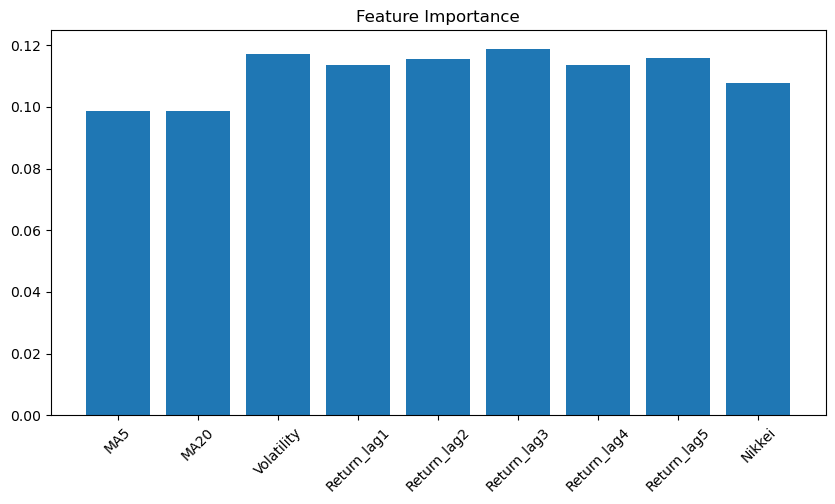

In [58]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Fetch market data
# -----------------------------
usd_jpy = yf.download("JPY=X", start="2010-01-01", end="2025-09-20", auto_adjust=True)
nikkei = yf.download("^N225", start="2010-01-01", end="2025-09-20", auto_adjust=True)

# Flatten MultiIndex columns if any
usd_jpy.columns = [col[0] if isinstance(col, tuple) else col for col in usd_jpy.columns]
nikkei.columns = [col[0] if isinstance(col, tuple) else col for col in nikkei.columns]

# Rename Close columns
usd_jpy.rename(columns={'Close':'USDJPY'}, inplace=True)
nikkei.rename(columns={'Close':'Nikkei'}, inplace=True)

# Compute returns
usd_jpy['Return_USDJPY'] = usd_jpy['USDJPY'].pct_change()
nikkei['Return_Nikkei'] = nikkei['Nikkei'].pct_change()

# Merge data
df = pd.merge(
    usd_jpy[['USDJPY','Return_USDJPY']],
    nikkei[['Nikkei','Return_Nikkei']],
    left_index=True, right_index=True, how='inner'
)
df.reset_index(inplace=True)  # bring Date from index to column

# -----------------------------
# 2️⃣ Technical features
# -----------------------------
df['MA5'] = df['USDJPY'].rolling(5).mean()
df['MA20'] = df['USDJPY'].rolling(20).mean()
df['Volatility'] = df['USDJPY'].rolling(5).std()

# Lagged returns
for lag in range(1,6):
    df[f'Return_lag{lag}'] = df['Return_USDJPY'].shift(lag)

# Target: 1 if next day up, 0 if down
df['Target'] = (df['Return_USDJPY'].shift(-1) > 0).astype(int)

df.dropna(inplace=True)

# -----------------------------
# 3️⃣ Macro features (optional CSVs)
# -----------------------------
# Uncomment and replace with actual CSVs
# fed = pd.read_csv("fed_rate.csv")  # columns: Date, FedRate
# fed['Date'] = pd.to_datetime(fed['Date'])
# boj = pd.read_csv("boj_rate.csv")  # columns: Date, BoJRate
# boj['Date'] = pd.to_datetime(boj['Date'])
# df = pd.merge(df, fed, on='Date', how='left')
# df = pd.merge(df, boj, on='Date', how='left')
# df.fillna(method='ffill', inplace=True)

# -----------------------------
# 4️⃣ Train-test split
# -----------------------------
feature_cols = ['MA5','MA20','Volatility'] + [f'Return_lag{lag}' for lag in range(1,6)] + ['Nikkei']
X = df[feature_cols]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# -----------------------------
# 5️⃣ Train Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 6️⃣ Feature importance
# -----------------------------
plt.figure(figsize=(10,5))
plt.bar(feature_cols, rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()


In [59]:
import pandas_datareader.data as web
from datetime import datetime

# -----------------------------
# 1️⃣ Fetch Fed Funds Rate (US)
# -----------------------------
start = datetime(2010,1,1)
end = datetime(2025,9,20)

fed = web.DataReader('FEDFUNDS', 'fred', start, end)  # Federal Funds Rate
fed.rename(columns={'FEDFUNDS':'FedRate'}, inplace=True)
fed.index.name = 'Date'

# -----------------------------
# 2️⃣ Fetch BoJ Rate (Japan)
# -----------------------------
boj = web.DataReader('IRLTLT01JPM156N', 'fred', start, end)  # Japan 10-Year Long-Term Government Bond Rate
boj.rename(columns={'IRLTLT01JPM156N':'BoJRate'}, inplace=True)
boj.index.name = 'Date'

# -----------------------------
# 3️⃣ Merge with df
# -----------------------------
df_macro = df.copy()
df_macro = pd.merge(df_macro, fed, left_on='Date', right_index=True, how='left')
df_macro = pd.merge(df_macro, boj, left_on='Date', right_index=True, how='left')

# Forward-fill missing values
df_macro.fillna(method='ffill', inplace=True)

# -----------------------------
# 4️⃣ Add Fed/BoJ to features
# -----------------------------
feature_cols_macro = feature_cols + ['FedRate','BoJRate']
X_macro = df_macro[feature_cols_macro]
y_macro = df_macro['Target']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_macro, y_macro, test_size=0.2, shuffle=False)

# -----------------------------
# 5️⃣ Train Random Forest with macro
# -----------------------------
rf_macro = RandomForestClassifier(n_estimators=200, random_state=42)
rf_macro.fit(X_train_m, y_train_m)
y_pred_macro = rf_macro.predict(X_test_m)

print("Accuracy with macro rates:", accuracy_score(y_test_m, y_pred_macro))


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\1437316435.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_macro.fillna(method='ffill', inplace=True)


Accuracy with macro rates: 0.4856020942408377


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\menen\AppData\Local\Temp\ipykernel_101856\365447255.py:64: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Accuracy: 0.4856020942408377
Confusion Matrix:
 [[252  88]
 [305 119]]


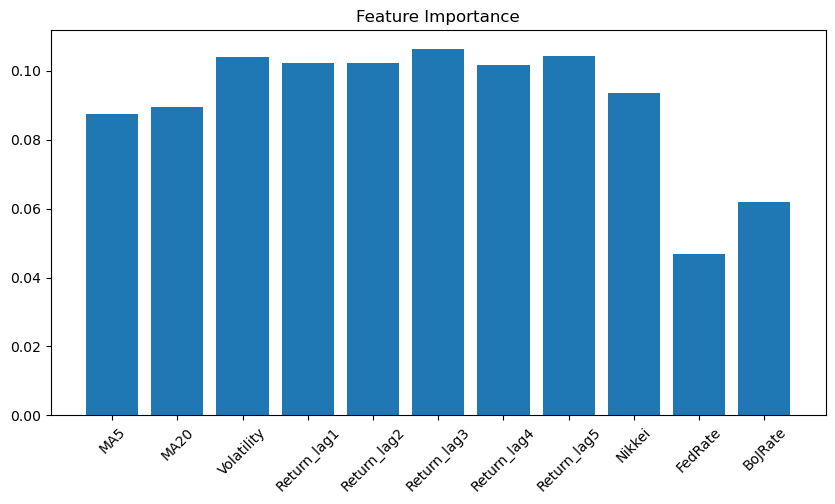

In [60]:
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Fetch market data
# -----------------------------
usd_jpy = yf.download("JPY=X", start="2010-01-01", end="2025-09-20", auto_adjust=True)
nikkei = yf.download("^N225", start="2010-01-01", end="2025-09-20", auto_adjust=True)

# Flatten MultiIndex columns
usd_jpy.columns = [col[0] if isinstance(col, tuple) else col for col in usd_jpy.columns]
nikkei.columns = [col[0] if isinstance(col, tuple) else col for col in nikkei.columns]

usd_jpy.rename(columns={'Close':'USDJPY'}, inplace=True)
nikkei.rename(columns={'Close':'Nikkei'}, inplace=True)

usd_jpy['Return_USDJPY'] = usd_jpy['USDJPY'].pct_change()
nikkei['Return_Nikkei'] = nikkei['Nikkei'].pct_change()

# Merge data
df = pd.merge(
    usd_jpy[['USDJPY','Return_USDJPY']],
    nikkei[['Nikkei','Return_Nikkei']],
    left_index=True, right_index=True, how='inner'
)
df.reset_index(inplace=True)

# -----------------------------
# 2️⃣ Technical indicators
# -----------------------------
df['MA5'] = df['USDJPY'].rolling(5).mean()
df['MA20'] = df['USDJPY'].rolling(20).mean()
df['Volatility'] = df['USDJPY'].rolling(5).std()

# Lagged returns
for lag in range(1,6):
    df[f'Return_lag{lag}'] = df['Return_USDJPY'].shift(lag)

df['Target'] = (df['Return_USDJPY'].shift(-1) > 0).astype(int)
df.dropna(inplace=True)

# -----------------------------
# 3️⃣ Fetch macro rates
# -----------------------------
start = datetime(2010,1,1)
end = datetime(2025,9,20)

fed = web.DataReader('FEDFUNDS', 'fred', start, end)
fed.rename(columns={'FEDFUNDS':'FedRate'}, inplace=True)
fed.index.name = 'Date'

boj = web.DataReader('IRLTLT01JPM156N', 'fred', start, end)
boj.rename(columns={'IRLTLT01JPM156N':'BoJRate'}, inplace=True)
boj.index.name = 'Date'

df = pd.merge(df, fed, left_on='Date', right_index=True, how='left')
df = pd.merge(df, boj, left_on='Date', right_index=True, how='left')
df.fillna(method='ffill', inplace=True)

# -----------------------------
# 4️⃣ Train-test split
# -----------------------------
feature_cols = ['MA5','MA20','Volatility'] + [f'Return_lag{lag}' for lag in range(1,6)] + ['Nikkei','FedRate','BoJRate']
X = df[feature_cols]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# -----------------------------
# 5️⃣ Train Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 6️⃣ Feature importance
# -----------------------------
plt.figure(figsize=(10,5))
plt.bar(feature_cols, rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()


In [61]:
pip install --upgrade tensorflow


In [62]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch USD/JPY data
usd_jpy = yf.download("JPY=X", start="2010-01-01", end="2025-09-20")

# Keep only 'Close' price
df = usd_jpy[['Close']].copy()
df.rename(columns={'Close':'Price'}, inplace=True)

# Calculate daily returns
df['Return'] = df['Price'].pct_change()

# Lagged returns (1 to 5 days)
for lag in range(1,6):
    df[f'Return_lag{lag}'] = df['Return'].shift(lag)

# Target variable: 1 if next day up, 0 if down
df['Target'] = (df['Return'].shift(-1) > 0).astype(int)

# Drop rows with NaN values
df.dropna(inplace=True)

df.head()


C:\Users\menen\AppData\Local\Temp\ipykernel_101856\245399947.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_jpy = yf.download("JPY=X", start="2010-01-01", end="2025-09-20")
[*********************100%***********************]  1 of 1 completed


Price,Price,Return,Return_lag1,Return_lag2,Return_lag3,Return_lag4,Return_lag5,Target
Ticker,JPY=X,,,,,,,
Date,,,,,,,,
2010-01-11,92.092003,-0.006130,-0.007817,0.011196,0.008418,-0.009838,-0.004574,0
2010-01-12,91.080002,-0.010989,-0.006130,-0.007817,0.011196,0.008418,-0.009838,1
2010-01-13,91.432999,0.003876,-0.010989,-0.006130,-0.007817,0.011196,0.008418,0
2010-01-14,91.266998,-0.001816,0.003876,-0.010989,-0.006130,-0.007817,0.011196,0
2010-01-15,90.750000,-0.005665,-0.001816,0.003876,-0.010989,-0.006130,-0.007817,0


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and target
X = df[['Return_lag1','Return_lag2','Return_lag3','Return_lag4','Return_lag5']]
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5354523227383863
Confusion Matrix:
 [[192 181]
 [199 246]]


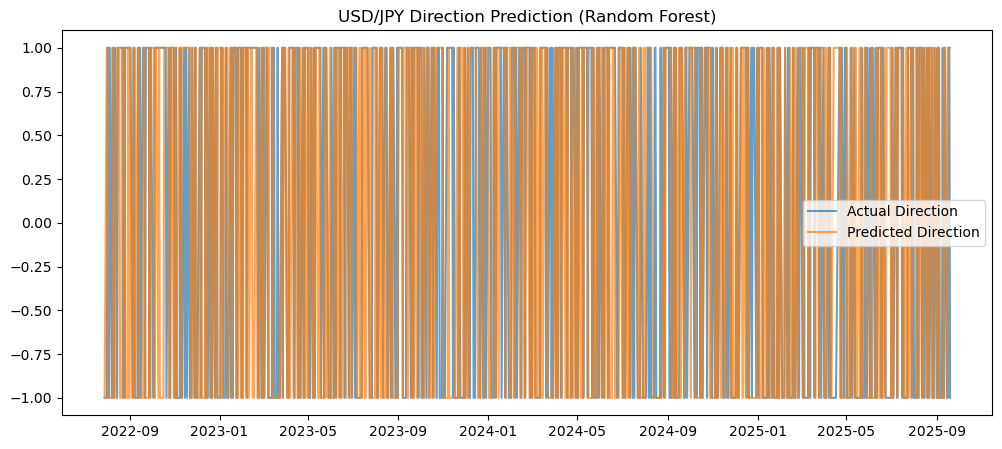

In [64]:
import matplotlib.pyplot as plt

df_test = df.iloc[-len(y_test):].copy()
df_test['Predicted'] = y_pred
df_test['ActualDirection'] = df_test['Target'].apply(lambda x: 1 if x==1 else -1)
df_test['PredictedDirection'] = df_test['Predicted'].apply(lambda x: 1 if x==1 else -1)

plt.figure(figsize=(12,5))
plt.plot(df_test.index, df_test['ActualDirection'], label='Actual Direction', alpha=0.7)
plt.plot(df_test.index, df_test['PredictedDirection'], label='Predicted Direction', alpha=0.7)
plt.legend()
plt.title("USD/JPY Direction Prediction (Random Forest)")
plt.show()


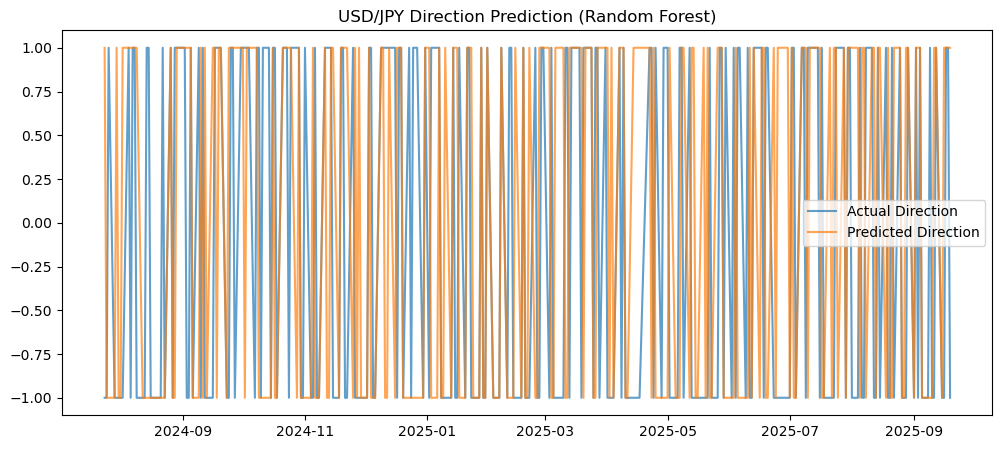

In [65]:
plt.figure(figsize=(12,5))
subset = df_test.iloc[-300:]  # last 300 days
plt.plot(subset.index, subset['ActualDirection'], label='Actual Direction', alpha=0.7)
plt.plot(subset.index, subset['PredictedDirection'], label='Predicted Direction', alpha=0.7)
plt.legend()
plt.title("USD/JPY Direction Prediction (Random Forest)")
plt.show()


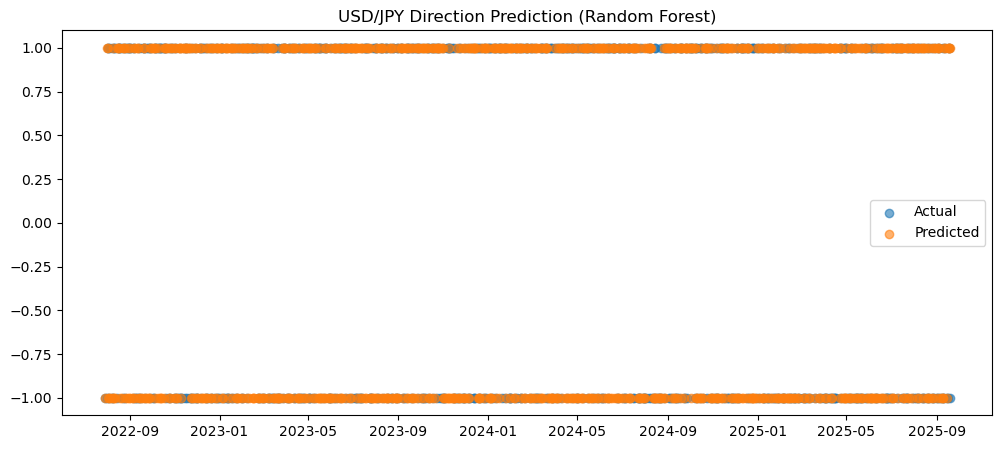

In [66]:
plt.figure(figsize=(12,5))
plt.scatter(df_test.index, df_test['ActualDirection'], label='Actual', alpha=0.6)
plt.scatter(df_test.index, df_test['PredictedDirection'], label='Predicted', alpha=0.6)
plt.legend()
plt.title("USD/JPY Direction Prediction (Random Forest)")
plt.show()


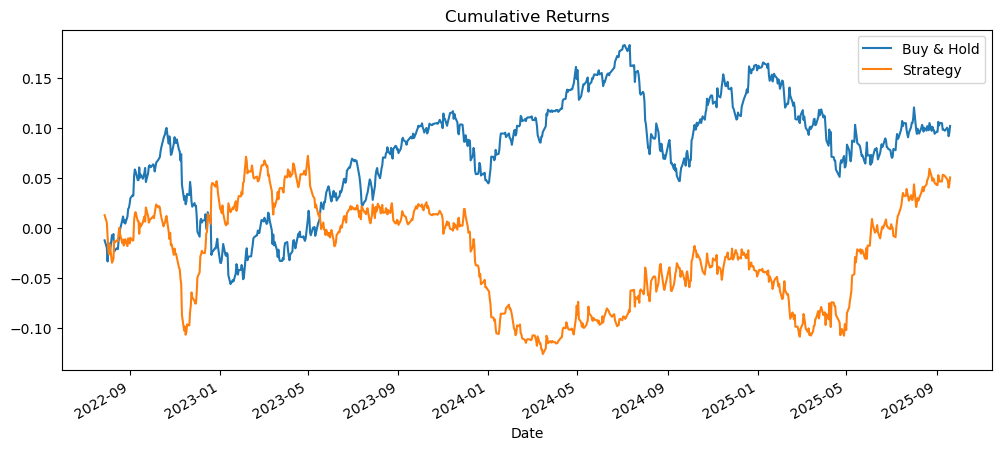

In [67]:
df_test['StrategyReturn'] = df_test['PredictedDirection'] * df_test['Return']
(df_test['Return'].cumsum()).plot(label='Buy & Hold', figsize=(12,5))
(df_test['StrategyReturn'].cumsum()).plot(label='Strategy')
plt.legend()
plt.title("Cumulative Returns")
plt.show()


In [68]:
import numpy as np

# Choose window size (timesteps)
timesteps = 10  

# Function to create sequences
def create_sequences(X, y, timesteps=10):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:(i+timesteps)].values)
        ys.append(y.iloc[i+timesteps])
    return np.array(Xs), np.array(ys)

# Recreate X, y with sequences
X_seq, y_seq = create_sequences(X, y, timesteps)

# Train/test split
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

print("X_train shape:", X_train.shape)  # (samples, timesteps, features)
print("y_train shape:", y_train.shape)


X_train shape: (3261, 10, 5)
y_train shape: (3261,)


In [69]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])


C:\Users\menen\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# Compile
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train
history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)
print("LSTM Accuracy:", lstm_acc)


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5088 - loss: 0.6934 - val_accuracy: 0.5253 - val_loss: 0.6926
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5081 - loss: 0.6933 - val_accuracy: 0.5253 - val_loss: 0.6925
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6929 - val_accuracy: 0.4747 - val_loss: 0.6967
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4950 - loss: 0.6938 - val_accuracy: 0.5253 - val_loss: 0.6931
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5042 - loss: 0.6934 - val_accuracy: 0.5253 - val_loss: 0.6931
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4985 - loss: 0.6934 - val_accuracy: 0.5253 - val_loss: 0.6923
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5042 - loss: 0.6931 - val_accuracy: 0.5253 - val_loss: 0.6928
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5050 - loss: 0.6934 - val_accuracy: 0.5253 - val_loss:

In [71]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip uninstall tensorflow tensorflow-intel


In [ ]:
pip install tensorflow-cpu


In [ ]:
!pip install yfinance
!pip install scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)
print("LSTM Accuracy:", lstm_acc)


In [ ]:
import pandas as pd
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "LSTM": lstm_acc
}
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df


In [ ]:
# 1 - imports & helpers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, classification_report)
from sklearn.inspection import permutation_importance
import joblib

sns.set()
RNG = 42

def fmt(df):
    """Quick inspect helper"""
    print(df.shape)
    display(df.head())


In [ ]:
# 2 - build df (example pipeline - modify if you already have df)
import yfinance as yf
usd_jpy = yf.download("JPY=X", start="2010-01-01", end="2025-09-20", auto_adjust=True)[['Close']].rename(columns={'Close':'Price'})
usd_jpy['Return'] = usd_jpy['Price'].pct_change()

# lagged features
for lag in range(1,6):
    usd_jpy[f'Return_lag{lag}'] = usd_jpy['Return'].shift(lag)

# simple moving averages/vol
usd_jpy['MA5'] = usd_jpy['Price'].rolling(5).mean()
usd_jpy['MA20'] = usd_jpy['Price'].rolling(20).mean()
usd_jpy['Volatility'] = usd_jpy['Return'].rolling(5).std()

# target: next-day direction
usd_jpy['Target'] = (usd_jpy['Return'].shift(-1) > 0).astype(int)

df = usd_jpy.dropna().reset_index()  # Date is index -> column
fmt(df)


In [ ]:
# 3 - train/eval wrapper
def evaluate_model(model, X_train, X_test, y_train, y_test, return_preds=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # predicted probabilities for ROC AUC if available
    y_prob = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }
    print(classification_report(y_test, y_pred))
    return (metrics, y_pred, y_prob) if return_preds else metrics

# split by time (no shuffle)
feature_cols = ['MA5','MA20','Volatility'] + [f'Return_lag{lag}' for lag in range(1,6)]
X = df[feature_cols]
y = df['Target']
split = int(0.8 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [ ]:
# 4 - baseline comparison
results = {}

# Dummy - always predict most frequent (or stratified)
dummy = DummyClassifier(strategy='most_frequent')
results['Dummy'] = evaluate_model(dummy, X_train, X_test, y_train, y_test)

# Logistic
log = LogisticRegression(max_iter=1000)
results['Logistic'] = evaluate_model(log, X_train, X_test, y_train, y_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=RNG)
results['RandomForest'] = evaluate_model(rf, X_train, X_test, y_train, y_test, return_preds=False)

pd.DataFrame(results).T


In [ ]:
# 5 - TimeSeriesSplit + RandomizedSearchCV
tscv = TimeSeriesSplit(n_splits=5)

param_dist = {
    'n_estimators': [100,200,500],
    'max_depth': [3,5,8,12,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

rf_base = RandomForestClassifier(random_state=RNG)
search = RandomizedSearchCV(rf_base, param_distributions=param_dist, n_iter=20,
                            cv=tscv, scoring='f1', n_jobs=-1, random_state=RNG)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)
best_rf = search.best_estimator_
evaluate_model(best_rf, X_train, X_test, y_train, y_test, return_preds=False)


In [ ]:
# 6 - feature importance
best_rf = rf if 'best_rf' not in globals() else best_rf

# built-in importances
fi = pd.Series(best_rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(8,4)); fi.plot.bar(); plt.title("RF feature importance"); plt.show()

# permutation importance (more reliable)
perm = permutation_importance(best_rf, X_test, y_test, n_repeats=20, random_state=RNG, n_jobs=-1)
perm_ser = pd.Series(perm.importances_mean, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(8,4)); perm_ser.plot.bar(); plt.title("Permutation importance (test)"); plt.show()


In [ ]:
# 7 - backtest function and run
from math import sqrt

def backtest(df_full, y_pred, X_test_idx, transaction_cost=0.0002):
    """
    df_full: original df aligned with X (has 'Return')
    y_pred: predicted directions (0/1)
    X_test_idx: index positions of test set in df_full (e.g., df.iloc[split:].index)
    returns:
      summary dict + DataFrame with returns
    """
    # build df_test DataFrame copy
    df_test = df_full.loc[X_test_idx].copy().reset_index(drop=True)
    # predicted direction to +/-1
    df_test['Predicted'] = y_pred
    df_test['PredictedDir'] = df_test['Predicted'].apply(lambda x: 1 if x==1 else -1)
    # strategy daily return: predicted direction * actual next-day return
    # We used target = (Return.shift(-1) > 0) earlier. Return column refers to same day pct_change.
    # So if PredictedDir is for day t, strategy return is PredictedDir * Return_t (assuming enter at close t and exit close t+1)
    df_test['StrategyReturn'] = df_test['PredictedDir'] * df_test['Return']
    # transaction cost when signal changes (round-trip cost)
    df_test['Trade'] = df_test['PredictedDir'].diff().fillna(0).abs()  # 0/2 when sign flips, 1 when goes to/from flat (if used)
    df_test['TradeCost'] = df_test['Trade'] * transaction_cost
    df_test['StrategyReturnNet'] = df_test['StrategyReturn'] - df_test['TradeCost']
    # cumulative
    df_test['CumStrategy'] = (1 + df_test['StrategyReturnNet']).cumprod()
    df_test['CumBH'] = (1 + df_test['Return']).cumprod()  # buy-and-hold starting at test start
    # metrics
    total_ret = df_test['CumStrategy'].iloc[-1] - 1
    ann_return = (1 + total_ret) ** (252/len(df_test)) - 1
    ann_vol = df_test['StrategyReturnNet'].std() * sqrt(252)
    sharpe = ann_return / ann_vol if ann_vol != 0 else np.nan
    # max drawdown
    roll_max = df_test['CumStrategy'].cummax()
    drawdown = (df_test['CumStrategy'] / roll_max) - 1
    max_dd = drawdown.min()
    win_rate = (df_test['StrategyReturnNet'] > 0).mean()
    summary = {
        'total_return': total_ret, 'annualized_return': ann_return,
        'annualized_vol': ann_vol, 'sharpe': sharpe, 'max_drawdown': max_dd,
        'win_rate': win_rate
    }
    return summary, df_test

# get y_pred from the best_rf on X_test
y_pred = best_rf.predict(X_test)
test_idx = df.iloc[split:].index  # index positions used above when we built df
summary, df_test = backtest(df, y_pred, test_idx, transaction_cost=0.0002)
summary


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_test.index, df_test['CumBH'], label='Buy & Hold')
plt.plot(df_test.index, df_test['CumStrategy'], label='Strategy (net)')
plt.legend(); plt.title("Cumulative Returns: Strategy vs Buy&Hold"); plt.show()


In [ ]:
# 8 - better plots
# small window scatter
window = 300
subset = df_test.iloc[-window:]
plt.figure(figsize=(12,3))
plt.scatter(subset.index, subset['PredictedDir'], label='Predicted', alpha=0.6)
plt.scatter(subset.index, subset['Return'].apply(lambda r: 0.0), label='zero', s=0)  # just baseline
plt.title("Predicted Directions (last {} days)".format(window)); plt.yticks([-1,1]); plt.show()

# rolling accuracy of predictions (match predicted sign to actual sign)
df_test['Correct'] = (np.sign(df_test['Return']) == df_test['PredictedDir']).astype(int)
df_test['RollingAcc'] = df_test['Correct'].rolling(50).mean()
plt.figure(figsize=(10,3)); plt.plot(df_test.index, df_test['RollingAcc']); plt.title("Rolling accuracy (50-day)"); plt.show()


In [ ]:
# thresholded strategy example
y_prob = best_rf.predict_proba(X_test)[:,1]
threshold = 0.6
pred_dir = np.where(y_prob > threshold, 1, np.where(y_prob < (1-threshold), -1, 0))  # 0 = skip
# compute returns where pred_dir != 0
# adapt backtest function to handle zero (no position)


In [ ]:
# 10 - save model and data
joblib.dump(best_rf, "rf_usdjpy_model.joblib")
df_test.to_csv("usdjpy_backtest_results.csv", index=False)

# Save summary
pd.Series(summary).to_frame('value').to_csv("strategy_summary.csv")
